In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

import tkinter as tk
from tkinter import filedialog as fd

In [5]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

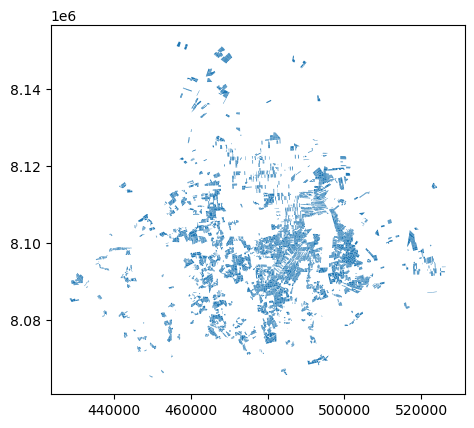

In [6]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)
data.plot()
plt.show()

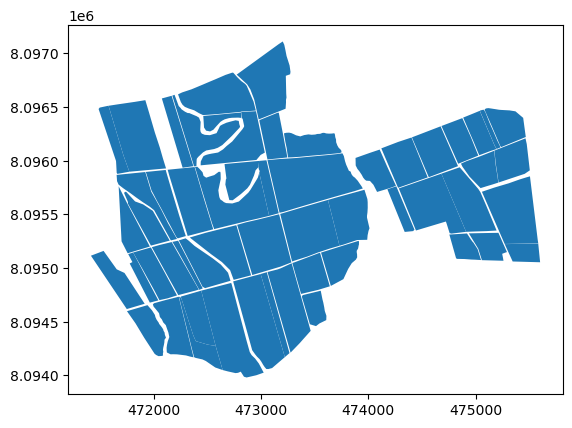

In [12]:
propiedad = data[data['unidad_01']==17]
propiedad.plot()
plt.show()

In [26]:
gdf_disuelto = data.dissolve(by='unidad_04')

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 500494.81370605587 8090880.3779164087 0 at 500494.81370605587 8090880.3779164087 0
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 500494.81370605587 8090880.3779164087 0 at 500494.81370605587 8090880.3779164087 0


ValueError: No Shapely geometry can be created from null value

In [19]:
propiedad['geometry'] = data.geometry.buffer(100)

C:\Users\Bismar\.conda\envs\estimativa_01\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


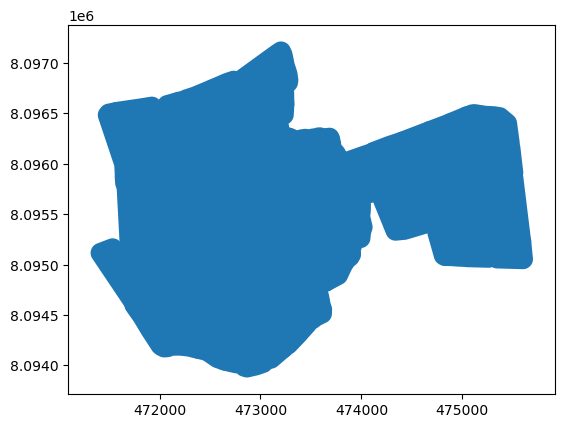

In [20]:
propiedad.plot()
plt.show()

In [21]:
propiedad

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
1065,0000170000C3,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,C3,CITTCA_85-22,7/5/2020,FA,IAG,2,canha,50,25.237523,"POLYGON ((472767.064 8093922.036, 472763.705 8..."
1066,0000170000C4,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,C4,CITTCA_85-22,7/5/2020,FA,IAG,2,canha,50,5.625935,"POLYGON ((472236.252 8094319.356, 472205.633 8..."
1067,0000170000B6.2,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,B6.2,CITTCA_85-22,13/4/2020,FY,IAG,2,canha,50,7.590585,"POLYGON ((473185.416 8096543.392, 473194.971 8..."
1068,0000170000C10,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,C10,RBB_77-26,13/4/2020,FY,IAG,2,canha,50,2.163707,"POLYGON ((472111.295 8095154.462, 472088.721 8..."
1069,0000170000C5,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,C5,CITTCA_85-22,7/5/2020,FA,IAG,2,canha,50,10.997715,"POLYGON ((472128.516 8094809.272, 472168.127 8..."
2634,0000170000C1,17.0,LA ESTACADA--OLGUITA,1215.0,AGUILERA RIVERO OLGA KARINA,C1,CITTCA_85-22,7/4/2021,FA,IAG,1,canha,50,16.911624,"POLYGON ((472964.476 8094935.559, 472962.205 8..."
2635,0000170000C7,17.0,LA ESTACADA--OLGUITA,1215.0,AGUILERA RIVERO OLGA KARINA,C7,UCG_90-20,15/4/2021,FA,IAG,1,canha,50,9.159677,"POLYGON ((471505.379 8094804.111, 471334.070 8..."
2636,0000170000C8,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,C8,RBB_77-26,25/4/2020,FY,IAG,2,canha,50,8.417907,"POLYGON ((471722.954 8095095.316, 471718.443 8..."
2637,0000170000C9,17.0,LA ESTACADA--OLGUITA,515.0,AGUILERA OLGA RIVERO VDA DE,C9,CITTCA_85-22,5/4/2022,FY,IAG,0,canha,50,9.629609,"POLYGON ((471896.246 8095145.931, 471891.871 8..."
2638,0000170000C11,17.0,LA ESTACADA--OLGUITA,40004.0,AGUILERA RIVERO NICOLAS JULIO,C11,RENOVACION,1/1/1900,FY,None,122,renovacion,50,9.574680,"POLYGON ((472270.448 8095372.331, 472279.613 8..."


In [15]:
propiedad.head(4)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
1065,0000170000C3,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,C3,CITTCA_85-22,7/5/2020,FA,IAG,2,canha,50,25.237523,"POLYGON Z ((472866.278 8094322.612 0.000, 4728..."
1066,0000170000C4,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,C4,CITTCA_85-22,7/5/2020,FA,IAG,2,canha,50,5.625935,"POLYGON Z ((472333.318 8094343.402 0.000, 4723..."
1067,0000170000B6.2,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,B6.2,CITTCA_85-22,13/4/2020,FY,IAG,2,canha,50,7.590585,"POLYGON Z ((473166.109 8096445.273 0.000, 4732..."
1068,0000170000C10,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,C10,RBB_77-26,13/4/2020,FY,IAG,2,canha,50,2.163707,"POLYGON Z ((472197.682 8095204.835 0.000, 4721..."
